In [1]:
import uproot
import numpy as np

import matplotlib.pyplot as plt

import zfit
import math
import scipy
import matplotlib

from hepstats.hypotests.calculators import AsymptoticCalculator
from hepstats.hypotests.parameters  import POIarray, POI

/Users/romoluque_c/anaconda3/lib/python3.10/site-packages/zfit/__init__.py:59: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(
/Users/romoluque_c/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cols = ['#CCCCCC', '#07A9FF', '#1A2A5B', '#FF9E21', '#149A9A', 'indianred', '#66283A', '#8A1859', '#BFC2C7',
        '#FFB0A8', '#B580CA', '#203769', '#909090', '#909090', '#83C369', '#FDED95', '#85F7C2', '#105D20',
        '#E77D4D', '#9D0008', '#EDDAB7', '#DCDCDC', '#DCDCDC', '#393939']

In [11]:
def find_zero_crossing(x, y):
    """
    Find the zero crossings of the spline interpolated function of y with respect to x.
    """
    tck = scipy.interpolate.splrep(x, y, s=0)
    return scipy.interpolate.sproot(tck)

def sci_notation(num, decimal_digits=1, precision=None, exponent=None):
    """
    Returns a string representation of the scientific
    notation of the given number formatted for use with
    LaTeX or Mathtext, with specified number of significant
    decimal digits and precision (number of decimal digits
    to show). The exponent to be used can also be specified
    explicitly.
    """
    if exponent is None:
        exponent = int(math.floor(math.log10(abs(num))))
    coeff = round(num / float(10 ** exponent), decimal_digits)
    if precision is None:
        precision = decimal_digits

    return r"{0:.{2}f}$\cdot$10$^{{{1:d}}}$".format(coeff, exponent, precision)

def set_border_line_width(ax: matplotlib.axes, lineWidth: float) -> None:
    """
    Utility function for getting the frame of an axis and setting the line width
    """
    [axis.set_linewidth(lineWidth) for axis in ax.spines.values()]

## SM 2nbb distribution

In [3]:
sm_2nbb_dist = np.loadtxt('/Users/romoluque_c/LEGEND/2nbb_distortions/Spectral_Effects_Fitting_Lars/L200_Spectral_Effects_Fitting/dist/standard_model/SM_2vbb_76Ge_sums.txt', usecols=(2), unpack=True)
sm_2nbb_dist = np.insert(sm_2nbb_dist, 0, 0, axis=0)

In [4]:
bins = np.arange(0, len(sm_2nbb_dist), 1)

## Double exotic fermion decay

In [6]:
basepath = '/Users/romoluque_c/LEGEND/2nbb_distortions/Spectral_Effects_Fitting_Lars/spectral_dist/'

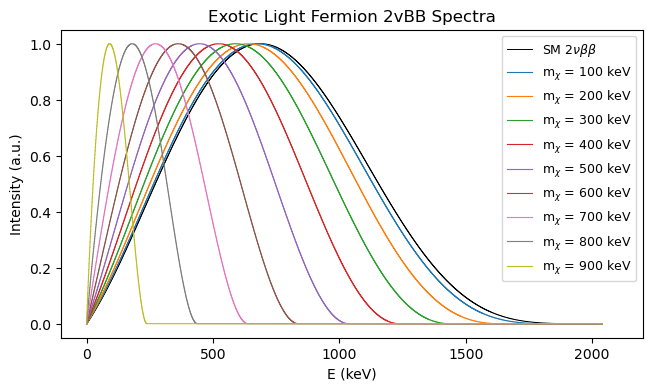

In [7]:
light_fermion_masses_keV = np.arange(100, 1000, 100)
def_signal_dist          = []

for idx, fermion_mass_keV in enumerate(light_fermion_masses_keV):
    sdist = np.loadtxt((basepath + 'dist/double_ferm/76Ge_2vbb_mnu_{}_{}_keV/76Ge_sums.txt'.format(fermion_mass_keV, fermion_mass_keV)), usecols=(2))
    sdist = np.insert(sdist, 0, 0, axis=0)
    sdist = sdist / np.sum(sdist)
    def_signal_dist.append(sdist)
    
fig, ax = plt.subplots(figsize=(7.5, 4))
ax.step(bins, sm_2nbb_dist/np.max(sm_2nbb_dist), c='k', lw=0.7, ls='-', label=r'SM 2$\nu\beta\beta$')

for sdist, fermion_mass_keV in zip(def_signal_dist, light_fermion_masses_keV):
    ax.step(bins, sdist/np.max(sdist), label=r'm$_{\chi}$ = ' + str(fermion_mass_keV) + ' keV', lw=0.8)

ax.set_xlim(-100, 2200)
ax.set_xlabel('E (keV)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_title('Exotic Light Fermion 2vBB Spectra')
ax.legend(fontsize=9)
plt.show()

# Sensitivity:

### L200 background data

In [8]:
data_path = '/Users/romoluque_c/LEGEND/2nbb_distortions/data_bckg_model/'

bckg_bins, tot_model = np.loadtxt(data_path + 'l200_p03_to_p09_icpc_total_model.txt', usecols=(0,1), unpack=True, skiprows=1, delimiter=',')
alphas_model         = np.loadtxt(data_path + 'l200_p03_to_p09_icpc_alphas.txt',      usecols=(1),   unpack=True, skiprows=1, delimiter=',')
co60_model           = np.loadtxt(data_path + 'l200_p03_to_p09_icpc_Co60_chain.txt',  usecols=(1),   unpack=True, skiprows=1, delimiter=',')
k40_model            = np.loadtxt(data_path + 'l200_p03_to_p09_icpc_K40_chain.txt',   usecols=(1),   unpack=True, skiprows=1, delimiter=',')
k42_model            = np.loadtxt(data_path + 'l200_p03_to_p09_icpc_K42_chain.txt',   usecols=(1),   unpack=True, skiprows=1, delimiter=',')
vvBB_model           = np.loadtxt(data_path + 'l200_p03_to_p09_icpc_Nvbb.txt',        usecols=(1),   unpack=True, skiprows=1, delimiter=',')
Th_model             = np.loadtxt(data_path + 'l200_p03_to_p09_icpc_Th_chain.txt',    usecols=(1),   unpack=True, skiprows=1, delimiter=',')
U_model              = np.loadtxt(data_path + 'l200_p03_to_p09_icpc_U_chain.txt',     usecols=(1),   unpack=True, skiprows=1, delimiter=',')
L200_actual_data     = np.loadtxt(data_path + 'l200_p03_to_p09_icpc_fitted_data.txt', usecols=(1),   unpack=True, skiprows=1, delimiter=',')

# From Neutrino2024 talk
L200_data_exposure = 76.2 #kg * yr

######## Normalize by exposure
total_model      = tot_model        # / L200_data_exposure
alphas_model     = alphas_model     # / L200_data_exposure
co60_model       = co60_model       # / L200_data_exposure
k40_model        = k40_model        # / L200_data_exposure
k42_model        = k42_model        # / L200_data_exposure
vvBB_model       = vvBB_model       # / L200_data_exposure
Th_model         = Th_model         # / L200_data_exposure
U_model          = U_model          # / L200_data_exposure
L200_actual_data = L200_actual_data # / L200_data_exposure

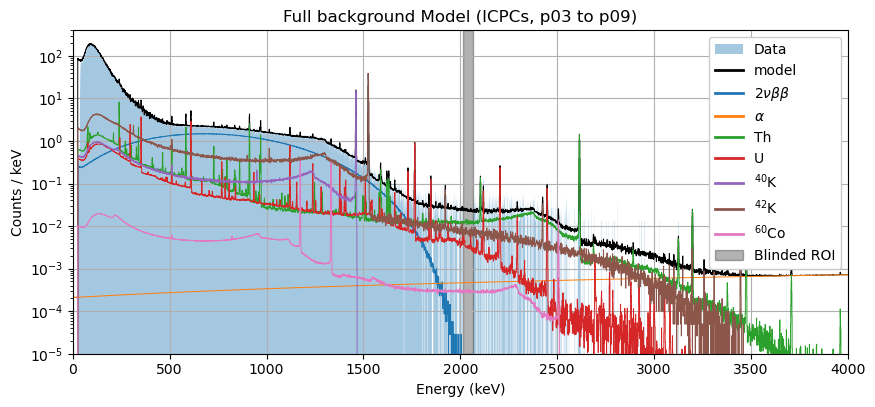

In [92]:
fig, ax = plt.subplots(figsize=(10, 4.2))
ax.fill_between(bckg_bins, 0, L200_actual_data, label=r'Data', alpha=0.4)
#ax.step(bckg_bins, L200_actual_data, label=r'Data', alpha=0.3)
ax.step(bckg_bins, total_model,  where='post', lw=0.7, label='model', color='black')
ax.step(bckg_bins, vvBB_model,   where='post', lw=0.7, label=r'$2\nu\beta\beta$')
ax.step(bckg_bins, alphas_model, where='post', lw=0.7, label=r'$\alpha$')
ax.step(bckg_bins, Th_model,     where='post', lw=0.7, label=r'Th')
ax.step(bckg_bins, U_model,      where='post', lw=0.7, label=r'U')
ax.step(bckg_bins, k40_model,    where='post', lw=0.7, label=r'$^{40}$K')
ax.step(bckg_bins, k42_model,    where='post', lw=0.7, label=r'$^{42}$K')
ax.step(bckg_bins, co60_model,   where='post', lw=0.7, label=r'$^{60}$Co')

# Shade blinded ROI
qbb      = 2039 # keV
roi_ampl =   50 # keV
ax.axvspan(qbb - roi_ampl/2, qbb + roi_ampl/2, label=r'Blinded ROI', alpha=0.3, color='black')
leg = ax.legend(loc='upper right', framealpha=1)
for line in leg.get_lines():
    line.set_linewidth(2)
ax.set_yscale('log')
#ax.set_title(f'Full background Model ({L200_data_exposure} kg year)')
ax.set_title(f'Full background Model (ICPCs, p03 to p09)')
#ax.set_ylabel('Counts / keV / (kg year)')
ax.set_ylabel('Counts / keV')
ax.set_xlabel('Energy (keV)')
#ax.set_ylim(1e-4, 4e2)
ax.set_ylim(1e-5, 4e2)
ax.set_xlim(0, 4000)
ax.grid()
#fig.savefig('./images/ICPCs/L200_bckg_model_ICPCs.pdf', bbox_inches='tight')
plt.show()

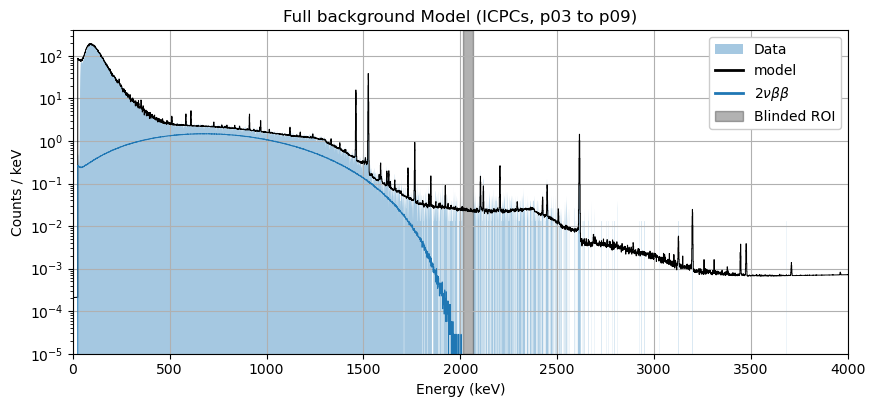

In [94]:
fig, ax = plt.subplots(figsize=(10, 4.2))
ax.fill_between(bckg_bins, 0, L200_actual_data, label=r'Data', alpha=0.4)
#ax.step(bckg_bins, L200_actual_data, label=r'Data', alpha=0.3)
ax.step(bckg_bins, total_model,  where='post', lw=0.7, label='model', color='black')
ax.step(bckg_bins, vvBB_model,   where='post', lw=0.7, label=r'$2\nu\beta\beta$')

# Shade blinded ROI
qbb      = 2039 # keV
roi_ampl =   50 # keV
ax.axvspan(qbb - roi_ampl/2, qbb + roi_ampl/2, label=r'Blinded ROI', alpha=0.3, color='black')
leg = ax.legend(loc='upper right', framealpha=1)
for line in leg.get_lines():
    line.set_linewidth(2)
ax.set_yscale('log')
#ax.set_title(f'Full background Model ({L200_data_exposure} kg year)')
ax.set_title(f'Full background Model (ICPCs, p03 to p09)')
#ax.set_ylabel('Counts / keV / (kg year)')
ax.set_ylabel('Counts / keV')
ax.set_xlabel('Energy (keV)')
#ax.set_ylim(1e-4, 4e2)
ax.set_ylim(1e-5, 4e2)
ax.set_xlim(0, 4000)
ax.grid()
#fig.savefig('./images/ICPCs/L200_bckg_model_ICPCs_2nbb.pdf', bbox_inches='tight')
plt.show()

## Spectrum subtracting 2nbb:

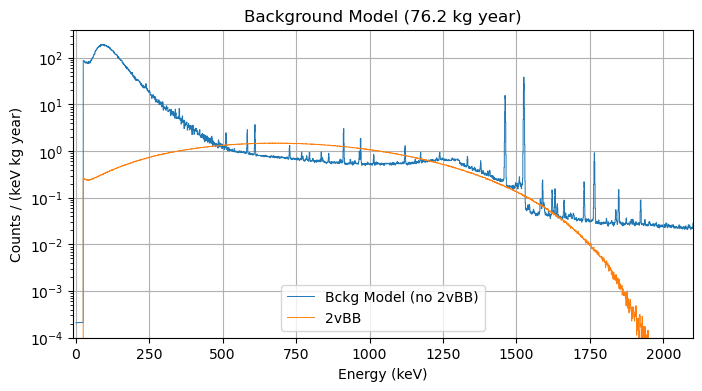

In [10]:
bckg_model = (total_model - vvBB_model)

fig, ax = plt.subplots(figsize=(8, 4))
ax.step(bckg_bins, bckg_model, where='post', lw=0.7, label='Bckg Model (no 2vBB)')
ax.step(bckg_bins, vvBB_model, where='post', lw=0.7, label='2vBB')
ax.set_yscale('log')
ax.set_ylim(1e-4, 4e2)
ax.set_title(f'Background Model ({L200_data_exposure} kg year)')
ax.set_ylabel("Counts / (keV kg year)")
ax.set_xlabel('Energy (keV)')
ax.set_xlim(-10, 2100)
ax.grid()
ax.legend()
plt.show()

## Double exotic fermion decay

In [24]:
# Significance Level
alpha = 0.1

# Fit range left endpoints min and max inclusive [min, max]
min_bin = 0
max_bin = 2039

# explain?
eff = 0.75

NA = 6.022141e23 # Avogadro's constant: atoms / mol
mA = 75.9214027e-3 # kg / mol of 76Ge

limits = (min_bin, max_bin + 1)
binning = max_bin + 1 - min_bin

bckg_model_fitrange = bckg_model[min_bin:max_bin + 1]
vvBB_model_fitrange = vvBB_model[min_bin:max_bin + 1]

exposure = L200_data_exposure

# Calculate the number of background and 2vBB events
Nbckg = exposure * np.sum(bckg_model_fitrange)
NvvBB = exposure * np.sum(vvBB_model_fitrange)

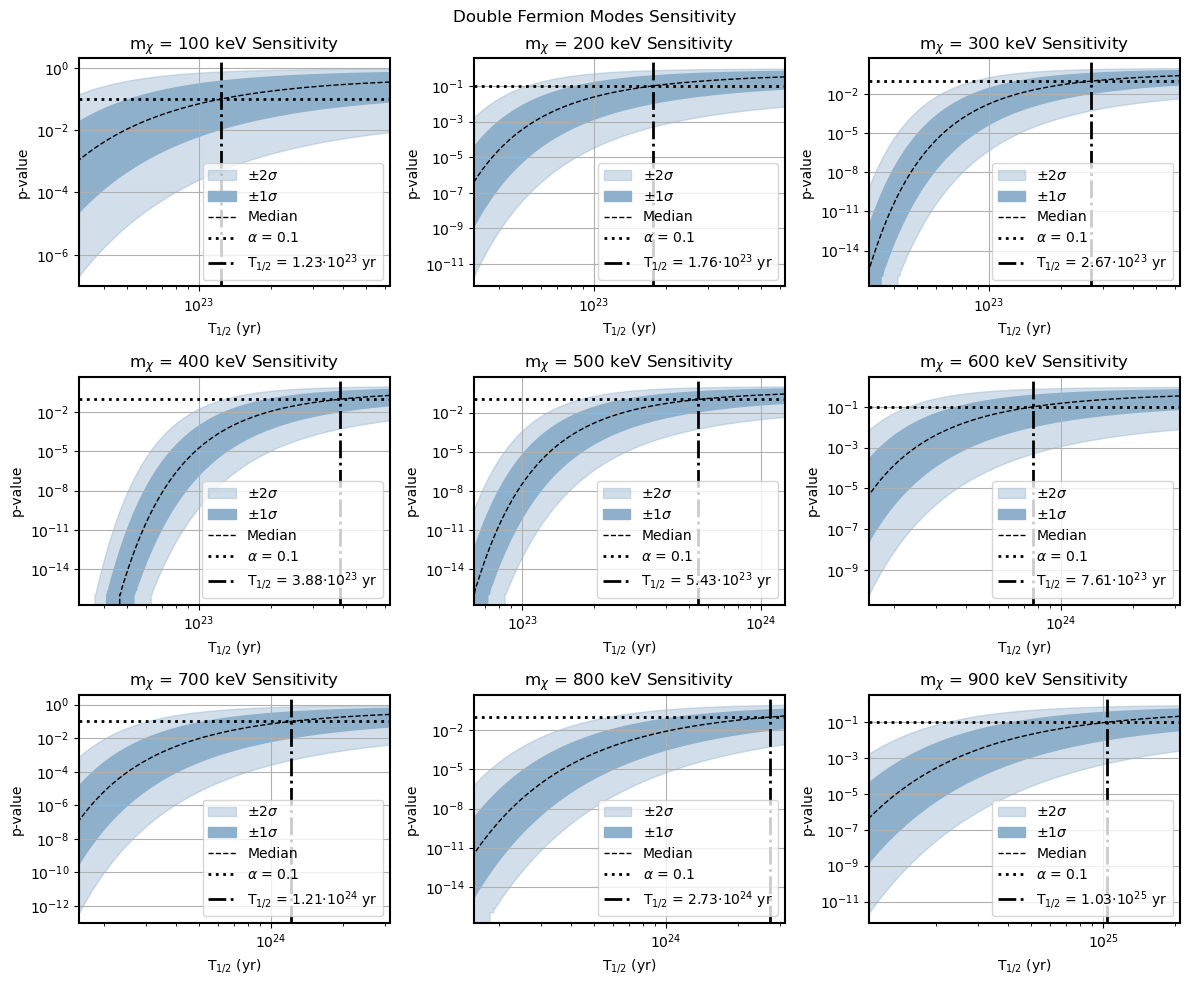

In [80]:
labels       = ['m_chi_'         + str(fermion_mass_keV) + '_keV' for fermion_mass_keV in light_fermion_masses_keV]
labels_fancy = [r'm$_{\chi}$ = ' + str(fermion_mass_keV) + ' keV' for fermion_mass_keV in light_fermion_masses_keV]
n_max_list   = [10000, 10000, 10000, 10000, 5000, 2000, 2000, 2000, 300]

# ===========================================================================
# Setup zfit values
obs      = zfit.Space('E', limits=limits, binning=binning)
n_signal = zfit.Parameter('n_signal',   0, 0, step_size=0.01)
n_bckg   = zfit.Parameter('n_bckg', Nbckg, 0, step_size=0.01)
n_vvBB   = zfit.Parameter('n_2vBB', NvvBB, 0, step_size=0.01)

# Pdfs
bckg_model_pdf = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=bckg_model_fitrange), extended=n_bckg)
vvBB_pdf       = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=vvBB_model_fitrange), extended=n_vvBB)

#all_half_life_sens = []

n_rows      = 3
n_columns   = (len(def_signal_dist) + 1) // n_rows
combined_fig, combined_ax = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(12, 10))
combined_ax = combined_ax.flatten()

combined_fig.suptitle('Double Fermion Modes Sensitivity')

for idx, (lab, lab_fancy, fmass_keV, sig_dist, n_max) in enumerate(zip(labels, labels_fancy, light_fermion_masses_keV, def_signal_dist, n_max_list)):
    # First check that the endpoint is in the fit range
    if 2039 - 2 * fermion_mass_keV < min_bin:
        continue

    sig_dist_fitrange     = sig_dist[min_bin:max_bin + 1]
    sig_dist_fitrange_eff = np.sum(sig_dist_fitrange) # sig_distribution already normalized to 1
    signal_pdf            = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=sig_dist_fitrange), extended=n_signal)
    # Model (signal + background)
    # Since both signal_pdf and background_model_pdf are extended PDF's we should not specify the fraction of each PDF
    model = zfit.pdf.BinnedSumPDF([signal_pdf, bckg_model_pdf, vvBB_pdf])

    n_signal.set_value(0)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    real_data = zfit.data.BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))

    # In theory the 'subtr_const': True should offset the loss function closer to 0. In practice the opposite is true.
    # After perusing the source code (https://zfit.readthedocs.io/en/v0.18.1/_modules/zfit/core/loss.html)
    # I see zfit is calculating `log_offset = (NLL - 10000) / nEventsTot` which is completely bogus for a binned fit
    # zfit should be using `log_offset = NLL / binning` because binning is the amount of bins we are actually fitting
    # In fact the loss function L is defined (https://zfit.readthedocs.io/en/stable/user_api/_generated/loss/zfit.loss.ExtendedBinnedNLL.html#extendedbinnednll)
    # as a product over the bins, so NLL will be O(binning) and not O(nEventsTot). So the calculated log_offset is bogus - Lars, June 24, 2024
    # nll = zfit.loss.ExtendedBinnedNLL(model, zfit.data.BinnedData.from_tensor(space=obs, values=model.counts()), options = {'subtr_const' : False})
    nll       = zfit.loss.ExtendedBinnedNLL(model, real_data, options = {'subtr_const' : False})
    minimizer = zfit.minimize.Minuit(verbosity=0)

    # Perturb n_signal away from 0 to get out of a local minimum at 0
    # Even when n_signal for the fake_data != 0 the fitting gets stuck there for some reason
    # This only happens sometimes, and more often when I don't bound n_signal, n_background > 0
    n_signal.set_value(1)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    result = minimizer.minimize(nll)
    result.hesse(name = 'hesse_np')

    calculator = AsymptoticCalculator(input=result, minimizer=minimizer)

    # https://hepstats.readthedocs.io/en/v0.6.1/getting_started/hypotests.html - Lars
    n_signal_hypot_vals = np.linspace(n_max / 20., n_max, 200)
    poialt  = POI(n_signal, 0) # Background only
    poinull = POIarray(n_signal, n_signal_hypot_vals) # Background + signal

    expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2])

    full_spec_cts      = n_signal_hypot_vals / sig_dist_fitrange_eff
    real_full_spec_cts = full_spec_cts / eff
    half_life          = (NA / mA) * (math.log(2) / real_full_spec_cts) * exposure
    inv_half_life      = 1 / half_life

    # Calculate sensitivity
    n_signal_sens           = find_zero_crossing(n_signal_hypot_vals, expected[0] - alpha)[0]
    n_signal_full_spec_sens = n_signal_sens / sig_dist_fitrange_eff
    real_full_spec_sens     = n_signal_full_spec_sens / eff
    half_life_sens          = (NA / mA) * (math.log(2) / real_full_spec_sens) * exposure
    inv_half_life_sens      = 1 / half_life_sens

    #all_half_life_sens.append(half_life_sens)
    
    # Plot result on both individual and combined plots
    fig, ax = plt.subplots()
    ax_to_plot = [ax, combined_ax[idx]]
    for ax in ax_to_plot:
        ax.fill_between(half_life, expected[3], expected[4], color='#8FB0CB', label=r'$\pm 2\sigma$', alpha=0.4)
        ax.fill_between(half_life, expected[1], expected[2], color='#8FB0CB', label=r'$\pm 1\sigma$')
        ax.plot(half_life, expected[0], c='black', lw=1, ls='dashed', label='Median')
        ax.axhline(alpha, lw=2, ls='dotted', color='black', label=r'$\alpha$ = ' + str(alpha))
        ax.axvline(half_life_sens, lw=2, ls='dashdot', color='black', label='T$_{1/2}$ = ' + sci_notation(half_life_sens, precision=2, decimal_digits=2) + ' yr')
        set_border_line_width(ax, 1.5)
        ax.set_title(lab_fancy + ' Sensitivity')
        ax.set_xlabel(r'T$_{1/2}$ (yr)')
        ax.set_ylabel('p-value')
        ax.set_xlim(min(half_life), max(half_life))
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.legend(loc='lower right')
        ax.grid()
    #fig.savefig('./images/ICPCs/doubleF_' + lab + '_ICPCs.pdf', bbox_inches='tight')
    plt.close(fig)

combined_fig.tight_layout()
#combined_fig.savefig('./images/ICPCs/doubleF_combined_ICPCs.pdf', bbox_inches='tight')
plt.show()

### Choose same range for all cases

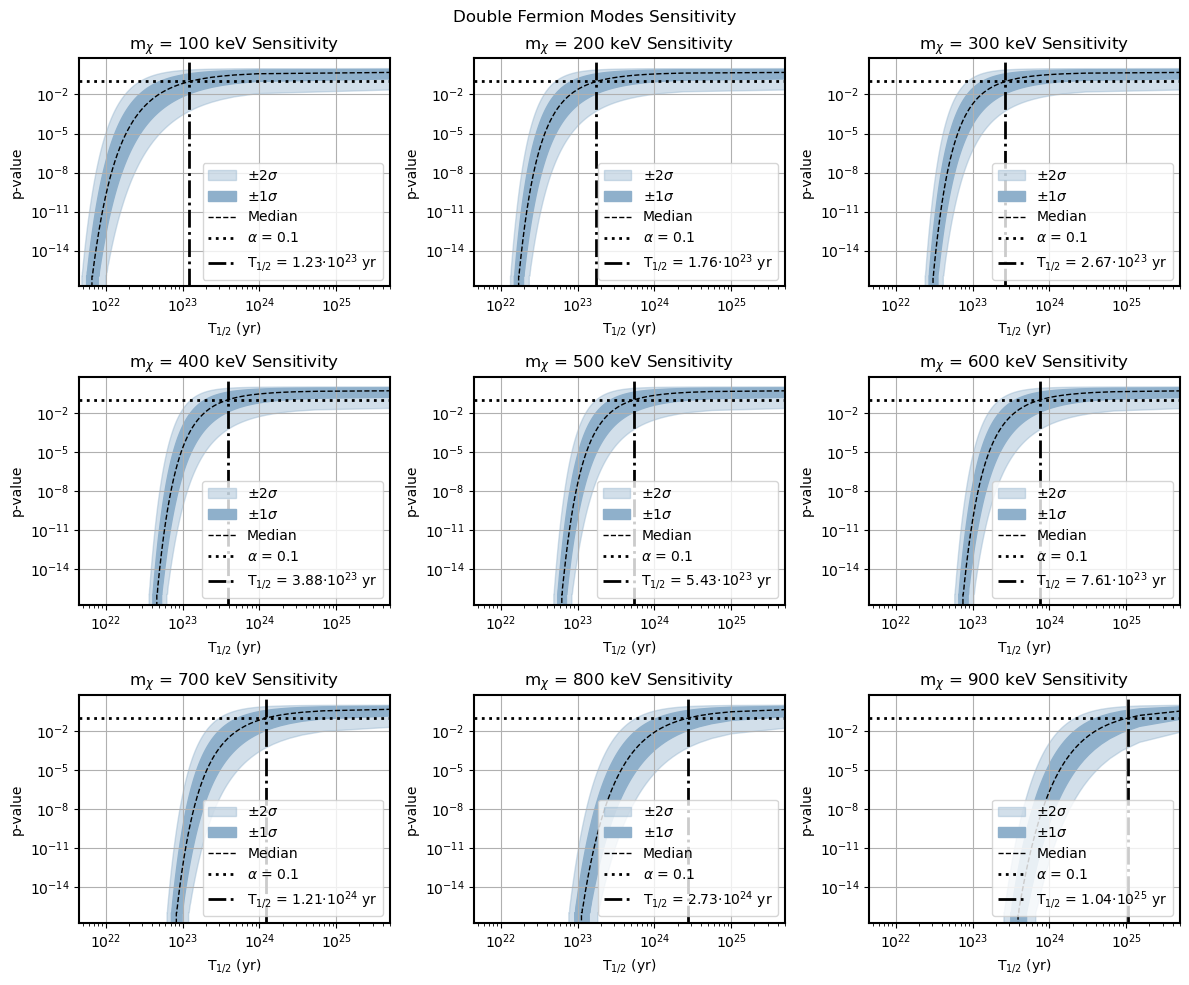

In [79]:
labels       = ['m_chi_'         + str(fermion_mass_keV) + '_keV' for fermion_mass_keV in light_fermion_masses_keV]
labels_fancy = [r'm$_{\chi}$ = ' + str(fermion_mass_keV) + ' keV' for fermion_mass_keV in light_fermion_masses_keV]
n_max_list   = [65000, 25000, 20000, 10000, 10000, 8000, 8000, 5000, 3000]
n_min_list   = [6 for i in range(len(n_max_list))]

# ===========================================================================
# Setup zfit values
obs      = zfit.Space('E', limits=limits, binning=binning)
n_signal = zfit.Parameter('n_signal',   0, 0, step_size=0.01)
n_bckg   = zfit.Parameter('n_bckg', Nbckg, 0, step_size=0.01)
n_vvBB   = zfit.Parameter('n_2vBB', NvvBB, 0, step_size=0.01)

# Pdfs
bckg_model_pdf = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=bckg_model_fitrange), extended=n_bckg)
vvBB_pdf       = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=vvBB_model_fitrange), extended=n_vvBB)

n_rows      = 3
n_columns   = (len(def_signal_dist) + 1) // n_rows
combined_fig, combined_ax = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(12, 10))
combined_ax = combined_ax.flatten()

combined_fig.suptitle('Double Fermion Modes Sensitivity')

all_half_life_sens = []
for idx, (lab, lab_fancy, fmass_keV, sig_dist, n_min, n_max) in enumerate(zip(labels, labels_fancy, light_fermion_masses_keV, def_signal_dist, n_min_list, n_max_list)):
    # First check that the endpoint is in the fit range
    if 2039 - 2 * fermion_mass_keV < min_bin:
        continue

    sig_dist_fitrange     = sig_dist[min_bin:max_bin + 1]
    sig_dist_fitrange_eff = np.sum(sig_dist_fitrange) # sig_distribution already normalized to 1
    signal_pdf            = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=sig_dist_fitrange), extended=n_signal)
    # Model (signal + background)
    # Since both signal_pdf and background_model_pdf are extended PDF's we should not specify the fraction of each PDF
    model = zfit.pdf.BinnedSumPDF([signal_pdf, bckg_model_pdf, vvBB_pdf])

    n_signal.set_value(0)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    real_data = zfit.data.BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))

    # In theory the 'subtr_const': True should offset the loss function closer to 0. In practice the opposite is true.
    # After perusing the source code (https://zfit.readthedocs.io/en/v0.18.1/_modules/zfit/core/loss.html)
    # I see zfit is calculating `log_offset = (NLL - 10000) / nEventsTot` which is completely bogus for a binned fit
    # zfit should be using `log_offset = NLL / binning` because binning is the amount of bins we are actually fitting
    # In fact the loss function L is defined (https://zfit.readthedocs.io/en/stable/user_api/_generated/loss/zfit.loss.ExtendedBinnedNLL.html#extendedbinnednll)
    # as a product over the bins, so NLL will be O(binning) and not O(nEventsTot). So the calculated log_offset is bogus - Lars, June 24, 2024
    # nll = zfit.loss.ExtendedBinnedNLL(model, zfit.data.BinnedData.from_tensor(space=obs, values=model.counts()), options = {'subtr_const' : False})
    nll       = zfit.loss.ExtendedBinnedNLL(model, real_data, options = {'subtr_const' : False})
    minimizer = zfit.minimize.Minuit(verbosity=0)

    # Perturb n_signal away from 0 to get out of a local minimum at 0
    # Even when n_signal for the fake_data != 0 the fitting gets stuck there for some reason
    # This only happens sometimes, and more often when I don't bound n_signal, n_background > 0
    n_signal.set_value(1)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    result = minimizer.minimize(nll)
    result.hesse(name = 'hesse_np')

    calculator = AsymptoticCalculator(input=result, minimizer=minimizer)

    # https://hepstats.readthedocs.io/en/v0.6.1/getting_started/hypotests.html - Lars
    n_signal_hypot_vals = np.linspace(n_min, n_max, 200)
    poialt  = POI(n_signal, 0) # Background only
    poinull = POIarray(n_signal, n_signal_hypot_vals) # Background + signal

    expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2])

    full_spec_cts      = n_signal_hypot_vals / sig_dist_fitrange_eff
    real_full_spec_cts = full_spec_cts / eff
    half_life          = (NA / mA) * (math.log(2) / real_full_spec_cts) * exposure
    inv_half_life      = 1 / half_life

    # Calculate sensitivity
    n_signal_sens           = find_zero_crossing(n_signal_hypot_vals, expected[0] - alpha)[0]
    n_signal_full_spec_sens = n_signal_sens / sig_dist_fitrange_eff
    real_full_spec_sens     = n_signal_full_spec_sens / eff
    half_life_sens          = (NA / mA) * (math.log(2) / real_full_spec_sens) * exposure
    
    all_half_life_sens.append(half_life_sens)
    
    # Plot result on both individual and combined plots
    fig, ax = plt.subplots()
    ax_to_plot = [ax, combined_ax[idx]]
    for ax in ax_to_plot:
        ax.fill_between(half_life, expected[3], expected[4], color='#8FB0CB', label=r'$\pm 2\sigma$', alpha=0.4)
        ax.fill_between(half_life, expected[1], expected[2], color='#8FB0CB', label=r'$\pm 1\sigma$')
        ax.plot(half_life, expected[0], c='black', lw=1, ls='dashed', label='Median')
        ax.axhline(alpha, lw=2, ls='dotted', color='black', label=r'$\alpha$ = ' + str(alpha))
        ax.axvline(half_life_sens, lw=2, ls='dashdot', color='black', label='T$_{1/2}$ = ' + sci_notation(half_life_sens, precision=2, decimal_digits=2) + ' yr')
        set_border_line_width(ax, 1.5)
        ax.set_title(lab_fancy + ' Sensitivity')
        ax.set_xlabel(r'T$_{1/2}$ (yr)')
        ax.set_ylabel('p-value')
        ax.set_xlim(4.5e21, 5e25)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.legend(loc='lower right')
        ax.grid()
    #fig.savefig('./images/ICPCs/doubleF_' + lab + '_ICPCs.pdf', bbox_inches='tight')
    plt.close(fig)

combined_fig.tight_layout()
#combined_fig.savefig('./images/ICPCs/doubleF_combined_ICPCs.pdf', bbox_inches='tight')
plt.show()

In [63]:
import sys

sys.path.append('/Users/romoluque_c/LEGEND/2nbb_distortions/Spectral_Effects_Fitting_Lars/spectral_dist/')

from analytic_phase_space_factors import G0, keV


me  = 0.511 # in MeV
fm  = 1./197 # in keV^-1
pi  = math.pi
gA2 = math.pow(1.2724, 2) #gA from PDG
A   = 75.921
R   = 1.2 * math.pow(A, 1 / 3) * fm

def coupling(half_life, NME, PS):
    g2 = 1. / (half_life * PS) * 8 * math.pow(pi * R / me / NME, 2)
    return math.sqrt(g2)

coupling_min = []
coupling_max = []
M_0n_1       = gA2 * 2.66  # Reference? BSM whitepaper cites it 203-213 as variance in NME calculations
M_0n_2       = gA2 * 6.04  # Reference?

fitted_fermion_masses_keV = []

for model_label, model_label_fancy, fermion_mass_keV, half_life_sens in zip(labels, labels_fancy, light_fermion_masses_keV, all_half_life_sens):
    # Check if we skipped this fit due to fit bounds
    if half_life_sens is None:
        continue

    ps    = G0(fermion_mass_keV * keV, fermion_mass_keV * keV)
    g_min = coupling(half_life_sens, M_0n_2, ps)
    g_max = coupling(half_life_sens, M_0n_1, ps)

    fitted_fermion_masses_keV.append(fermion_mass_keV)
    coupling_min.append(g_min)
    coupling_max.append(g_max)

    print(('Model = {}, half-life = {} yr, Coupling_min = {}, Coupling_max={}'.format(model_label_fancy, half_life_sens, g_min, g_max)))

Model = m$_{\chi}$ = 100 keV, half-life = 1.2318581042677229e+23 yr, Coupling_min = 0.0006408189597437688, Coupling_max=0.0014550926755084075
Model = m$_{\chi}$ = 200 keV, half-life = 1.7606662117623316e+23 yr, Coupling_min = 0.0005979431068191854, Coupling_max=0.0013577354756345414
Model = m$_{\chi}$ = 300 keV, half-life = 2.6653791769391186e+23 yr, Coupling_min = 0.0005797617976019255, Coupling_max=0.001316451600569786
Model = m$_{\chi}$ = 400 keV, half-life = 3.882726728482423e+23 yr, Coupling_min = 0.0006142555355352886, Coupling_max=0.0013947757273056931
Model = m$_{\chi}$ = 500 keV, half-life = 5.432555082406653e+23 yr, Coupling_min = 0.000718728457451569, Coupling_max=0.0016319999560178487
Model = m$_{\chi}$ = 600 keV, half-life = 7.610705209347314e+23 yr, Coupling_min = 0.0009283110383884819, Coupling_max=0.002107894237543771
Model = m$_{\chi}$ = 700 keV, half-life = 1.2146916988942876e+24 yr, Coupling_min = 0.0012918719044359632, Coupling_max=0.0029334234221027136
Model = m$_{

In [64]:
### Save computed data
# filename = './results/sensitivity_doubleF_LEGEND200_fit_0_2039.npz'
# np.savez(filename, masses=fitted_fermion_masses_keV, limits=[coupling_min, coupling_max])

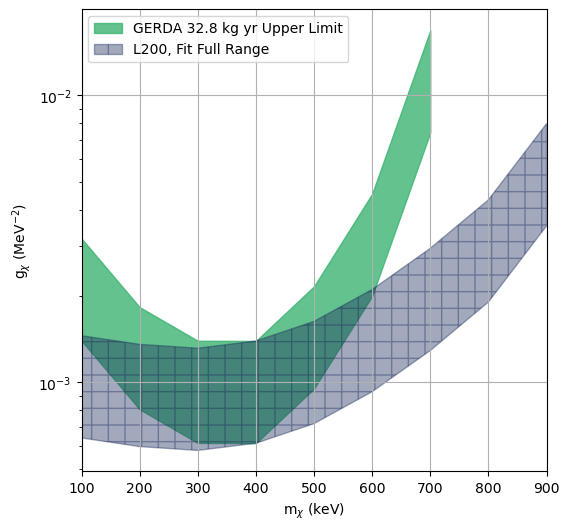

In [75]:
#GERDA 32.8 kg yr
data_doubleF_gerda   = np.load('/Users/romoluque_c/LEGEND/2nbb_distortions/Spectral_Effects_Fitting_Lars/spectral_dist/results/results_gerda2022_double-fermions_all.npz')
masses_doubleF_gerda = data_doubleF_gerda['masses']
limits_doubleF_gerda = data_doubleF_gerda['limits']

# LEGEND
filename            = './results/sensitivity_doubleF_LEGEND200_fit_0_2039.npz'
data_doubleF_full   = np.load(filename)
masses_doubleF_full = data_doubleF_full['masses']
limits_doubleF_full = data_doubleF_full['limits']

#plot
fig, ax = plt.subplots(figsize=(6,6))
ax.fill_between(masses_doubleF_gerda, limits_doubleF_gerda[0], limits_doubleF_gerda[1], label='GERDA 32.8 kg yr Upper Limit', color='mediumseagreen', alpha=0.8)
ax.fill_between(masses_doubleF_full,  limits_doubleF_full [0], limits_doubleF_full [1], label='L200, Fit Full Range',         facecolor='#1A2A5B', hatch='+', edgecolor='#1A2A5B', alpha=0.4)
ax.set_yscale('log')
ax.set_xlim(100,900)
ax.set_xlabel(r'm$_\chi$ (keV)')
ax.set_ylabel(r'g$_\chi$ (MeV$^{-2}$)')
ax.legend(loc='upper left')
ax.grid()

#plt.savefig('./images/ICPCs/LEGEND_200_sensitivity_exotic_fermions_ICPCs.pdf', bbox_inches='tight')

## Tests

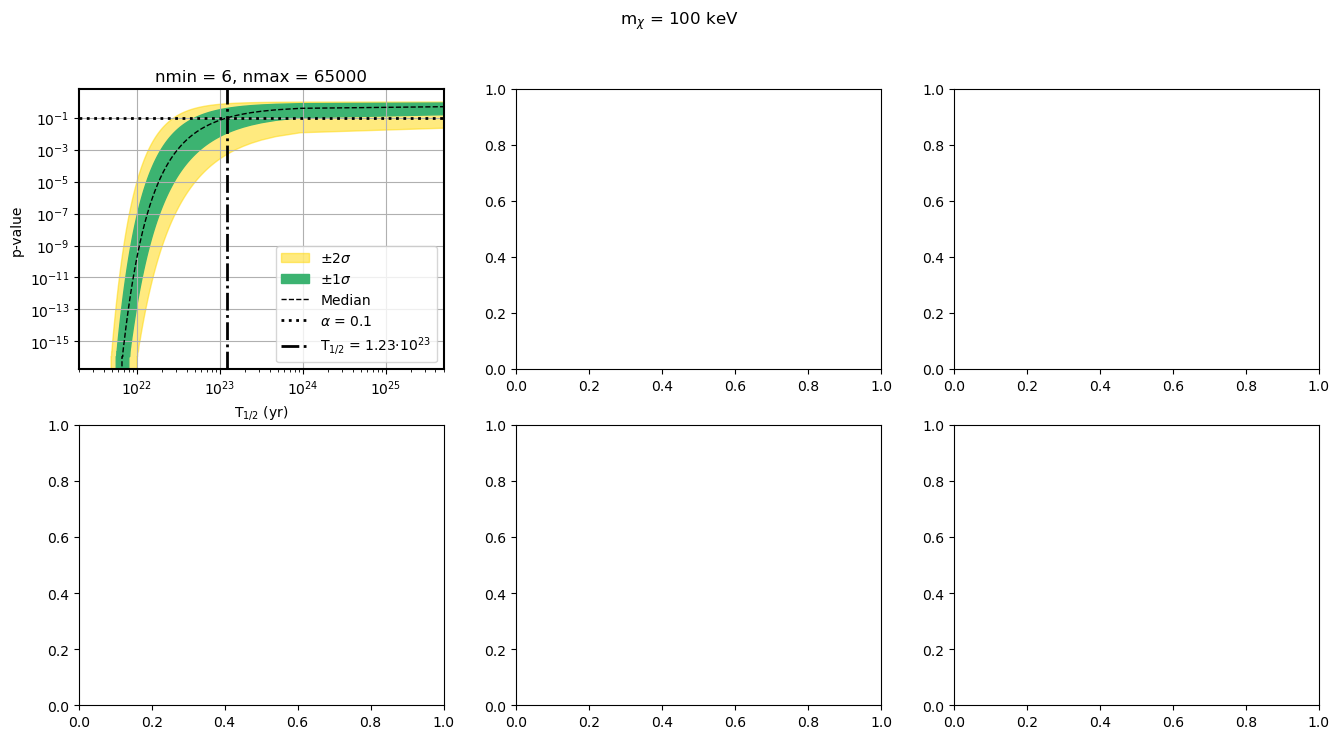

In [58]:
lab       = labels                  [0]
lab_fancy = labels_fancy            [0]
sig_dist  = def_signal_dist         [0]
fmass_keV = light_fermion_masses_keV[0]
#n_max     = n_max_list             [0]
n_min     = 6

fig, axs = plt.subplots(2, 3, figsize=(16, 8))
fig.suptitle(lab_fancy)

for n_max, ax in zip([65000], axs.flatten()):
    sig_dist_fitrange     = sig_dist[min_bin:max_bin + 1]
    sig_dist_fitrange_eff = np.sum(sig_dist_fitrange) # sig_distribution already normalized to 1
    signal_pdf            = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=sig_dist_fitrange), extended=n_signal)
    model = zfit.pdf.BinnedSumPDF([signal_pdf, bckg_model_pdf, vvBB_pdf])

    n_signal.set_value(0)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    real_data = zfit.data.BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))
    nll       = zfit.loss    .ExtendedBinnedNLL(model, real_data, options = {'subtr_const' : False})
    minimizer = zfit.minimize.Minuit(verbosity=0)
    
    n_signal.set_value(1)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    result = minimizer.minimize(nll)
    result.hesse(name = 'hesse_np')

    calculator = AsymptoticCalculator(input=result, minimizer=minimizer)

    n_signal_hypot_vals = np.linspace(n_min, n_max, 200)
    poialt  = POI(n_signal, 0) # Background only
    poinull = POIarray(n_signal, n_signal_hypot_vals) # Background + signal

    expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2])

    full_spec_cts      = n_signal_hypot_vals / sig_dist_fitrange_eff
    real_full_spec_cts = full_spec_cts / eff
    half_life          = (NA / mA) * (math.log(2) / real_full_spec_cts) * exposure
    inv_half_life      = 1 / half_life

    # Calculate sensitivity
    n_signal_sens           = find_zero_crossing(n_signal_hypot_vals, expected[0] - alpha)[0]
    n_signal_full_spec_sens = n_signal_sens / sig_dist_fitrange_eff
    real_full_spec_sens     = n_signal_full_spec_sens / eff
    half_life_sens          = (NA / mA) * (math.log(2) / real_full_spec_sens) * exposure
    
    ax.fill_between(half_life, expected[3], expected[4], color='gold', label=r'$\pm 2\sigma$', alpha=0.5)
    ax.fill_between(half_life, expected[1], expected[2], color='mediumseagreen', label=r'$\pm 1\sigma$')
    ax.plot(half_life, expected[0], c='black', lw=1, ls='dashed', label='Median')
    ax.axhline(alpha, lw=2, ls='dotted', color='black', label=r'$\alpha$ = ' + str(alpha))
    ax.axvline(half_life_sens, lw=2, ls='dashdot', color='black', label='T$_{1/2}$ = ' + sci_notation(half_life_sens, precision=2, decimal_digits=2))
    set_border_line_width(ax, 1.5)
    ax.set_title(f'nmin = {n_min}, nmax = {n_max}')
    ax.set_xlabel(r'T$_{1/2}$ (yr)')
    ax.set_ylabel('p-value')
    #ax.set_xlim(min(half_life), max(half_life))
    ax.set_xlim(2e21, 5e25)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend(loc='lower right')
    ax.grid()

plt.show()


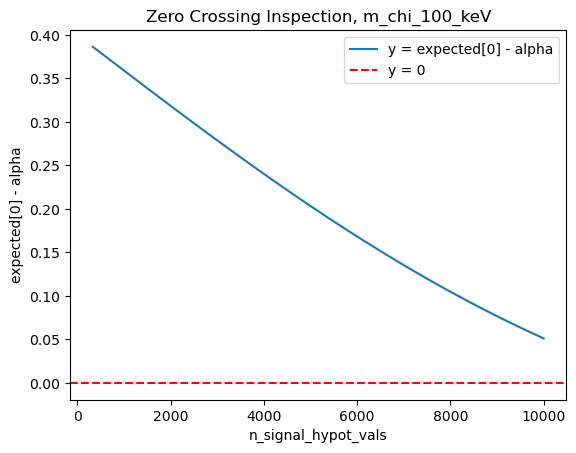

Zero Crossings: []


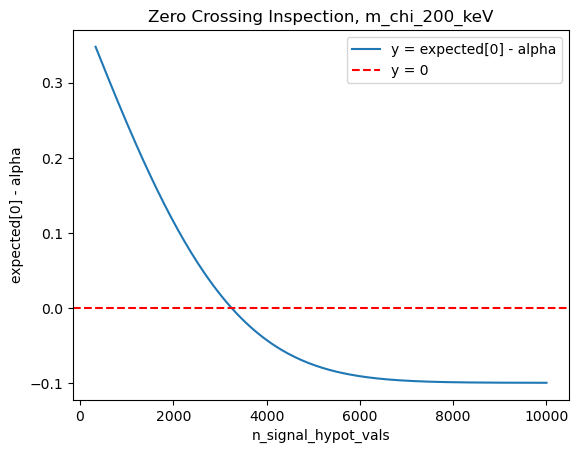

Zero Crossings: [3245.35211851]


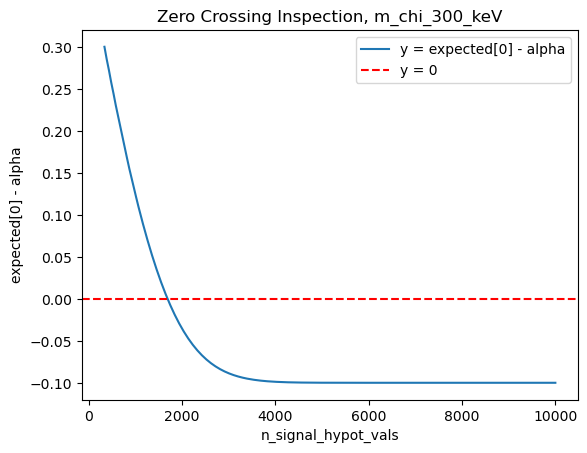

Zero Crossings: [1686.95015442]


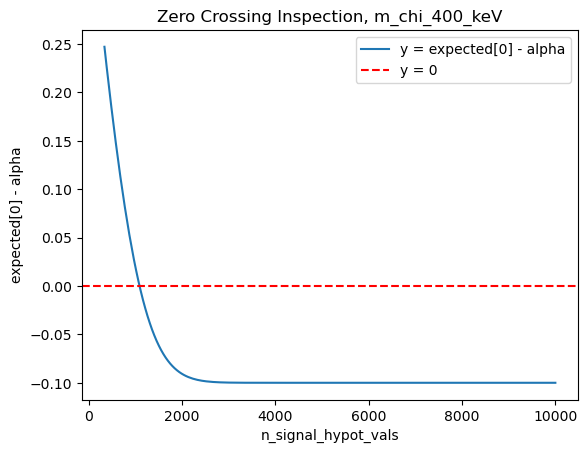

Zero Crossings: [1085.71193099]


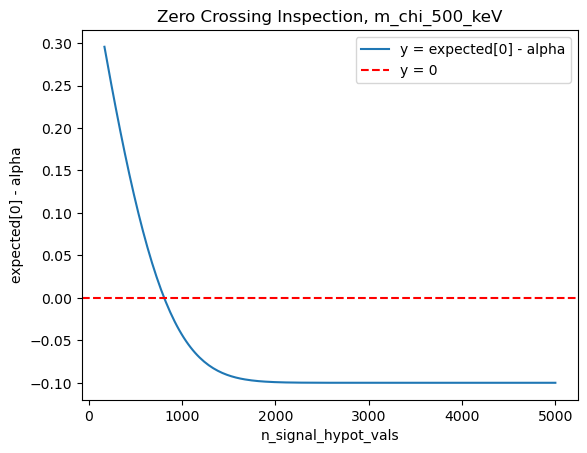

Zero Crossings: [806.88056113]


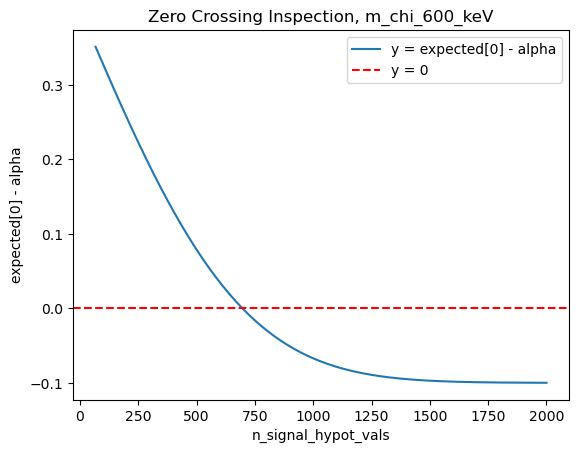

Zero Crossings: [696.43061294]


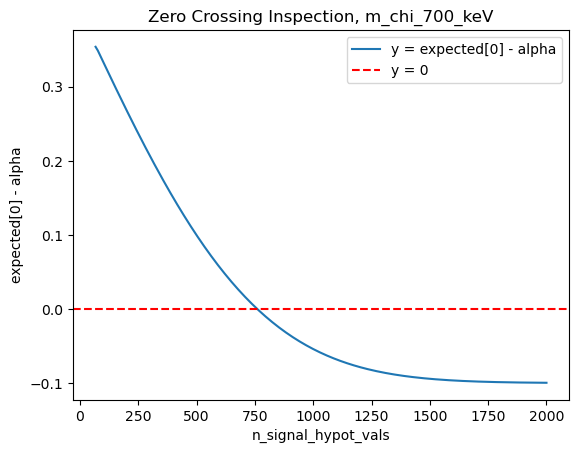

Zero Crossings: [759.64419776]


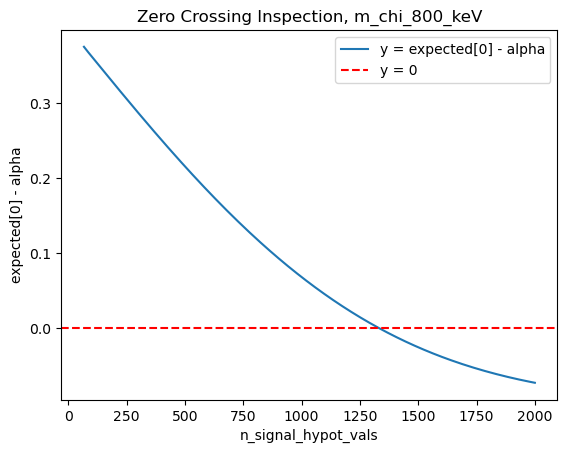

Zero Crossings: [1330.9826302]


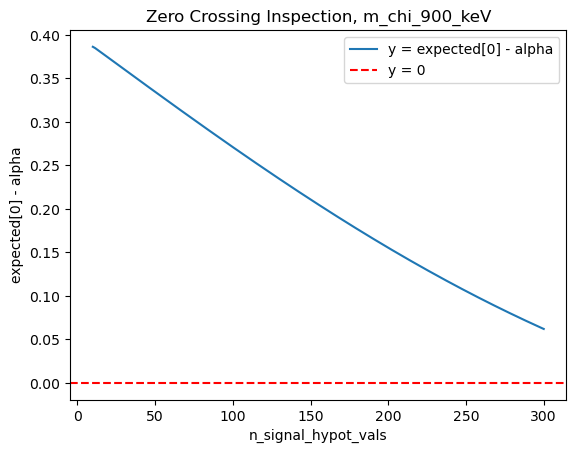

Zero Crossings: []


In [55]:
for idx, (lab, lab_fancy, fmass_keV, sig_dist, n_max) in enumerate(zip(labels, labels_fancy, light_fermion_masses_keV, def_signal_dist, n_max_list)):
    # First check that the endpoint is in the fit range
    if 2039 - 2 * fermion_mass_keV < min_bin:
        continue

    sig_dist_fitrange     = sig_dist[min_bin:max_bin + 1]
    sig_dist_fitrange_eff = np.sum(sig_dist_fitrange) # sig_distribution already normalized to 1
    signal_pdf            = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=sig_dist_fitrange), extended=n_signal)
    
    model = zfit.pdf.BinnedSumPDF([signal_pdf, bckg_model_pdf, vvBB_pdf])

    n_signal.set_value(0)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    real_data = zfit.data    .BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))
    nll       = zfit.loss    .ExtendedBinnedNLL(model, real_data, options = {'subtr_const' : False})
    minimizer = zfit.minimize.Minuit(verbosity=0)

    n_signal.set_value(1)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    result = minimizer.minimize(nll)
    result.hesse(name = 'hesse_np')

    calculator = AsymptoticCalculator(input=result, minimizer=minimizer)

    # https://hepstats.readthedocs.io/en/v0.6.1/getting_started/hypotests.html - Lars
    n_signal_hypot_vals = np.linspace(n_max / 30., n_max, 200)
    poialt  = POI(n_signal, 0) # Background only
    poinull = POIarray(n_signal, n_signal_hypot_vals) # Background + signal

    expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2])

    full_spec_cts      = n_signal_hypot_vals / sig_dist_fitrange_eff
    real_full_spec_cts = full_spec_cts / eff
    half_life          = (NA / mA) * (math.log(2) / real_full_spec_cts) * exposure
    inv_half_life      = 1 / half_life

    
    plt.plot(n_signal_hypot_vals, expected[0] - alpha, label='y = expected[0] - alpha')
    plt.axhline(0, color='red', linestyle='--', label='y = 0')
    plt.xlabel('n_signal_hypot_vals')
    plt.ylabel('expected[0] - alpha')
    plt.title(f'Zero Crossing Inspection, {lab}')
    plt.legend()
    plt.show()
    
    zero_crossings = find_zero_crossing(n_signal_hypot_vals, expected[0] - alpha)
    print("Zero Crossings:", zero_crossings)

Zero Crossings: [2550.36107441]
Zero Crossings: [1784.41075518]
Zero Crossings: [1178.74914845]
Zero Crossings: [809.27415174]
Zero Crossings: [578.42612716]
Zero Crossings: [412.86862839]
Zero Crossings: [258.68029822]
Zero Crossings: [115.30015603]
Zero Crossings: [30.38199805]


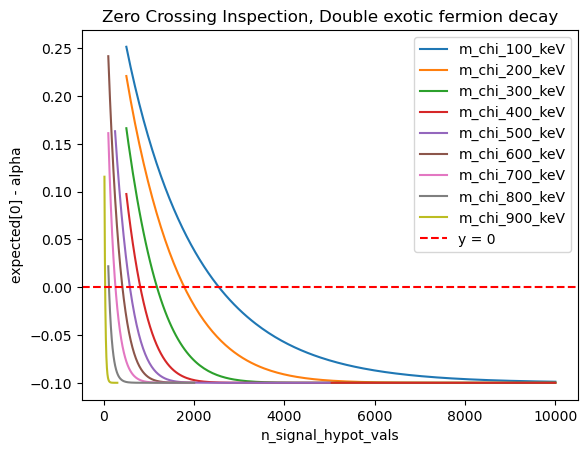

In [39]:
for idx, (lab, lab_fancy, fmass_keV, sig_dist, n_max) in enumerate(zip(labels, labels_fancy, light_fermion_masses_keV, def_signal_dist, n_max_list)):
    # First check that the endpoint is in the fit range
    if 2039 - 2 * fermion_mass_keV < min_bin:
        continue

    sig_dist_fitrange     = sig_dist[min_bin:max_bin + 1]
    sig_dist_fitrange_eff = np.sum(sig_dist_fitrange) # sig_distribution already normalized to 1
    signal_pdf            = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=sig_dist_fitrange), extended=n_signal)
    
    model = zfit.pdf.BinnedSumPDF([signal_pdf, bckg_model_pdf, vvBB_pdf])

    n_signal.set_value(0)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    real_data = zfit.data    .BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))
    nll       = zfit.loss    .ExtendedBinnedNLL(model, real_data, options = {'subtr_const' : False})
    minimizer = zfit.minimize.Minuit(verbosity=0)

    n_signal.set_value(1)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    result = minimizer.minimize(nll)
    result.hesse(name = 'hesse_np')

    calculator = AsymptoticCalculator(input=result, minimizer=minimizer)

    # https://hepstats.readthedocs.io/en/v0.6.1/getting_started/hypotests.html - Lars
    n_signal_hypot_vals = np.linspace(n_max / 20., n_max, 200)
    poialt  = POI(n_signal, 0) # Background only
    poinull = POIarray(n_signal, n_signal_hypot_vals) # Background + signal

    expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2])

    full_spec_cts      = n_signal_hypot_vals / sig_dist_fitrange_eff
    real_full_spec_cts = full_spec_cts / eff
    half_life          = (NA / mA) * (math.log(2) / real_full_spec_cts) * exposure
    inv_half_life      = 1 / half_life

    plt.plot(n_signal_hypot_vals, expected[0] - alpha, label=f'{lab}')
    
    zero_crossings = find_zero_crossing(n_signal_hypot_vals, expected[0] - alpha)
    print("Zero Crossings:", zero_crossings)

plt.axhline(0, color='red', linestyle='--', label='y = 0')
plt.xlabel('n_signal_hypot_vals')
plt.ylabel('expected[0] - alpha')
plt.title(f'Zero Crossing Inspection, Double exotic fermion decay')
plt.legend()
plt.show()